In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("train.csv")

In [3]:
print(df.describe())
print(df)


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
     PassengerId  Survived  Pclass  \
0              1         0       3   
1    

In [4]:
print(df.Sex.value_counts())
print(df.Pclass.value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [5]:
train = df #Creating a "train" database for modifications

#dropping data with little use and converting the male/female to 0 and 1
train = train.drop("Name", axis=1) 
train = train.drop("Ticket", axis=1)
train = train.drop("Embarked", axis=1)
train = train.drop("Cabin", axis=1)
train['Sex'].replace('female', 0, inplace=True)
train['Sex'].replace('male', 1, inplace=True)
train['Age'].replace('NaN', 28.00, inplace=True)
# Here is just some expreimentations to see what are the most important parameters
#train = train.drop("Sex", axis=1)
#train = train.drop("Age", axis=1)
#train = train.drop("Pclass", axis=1)
#Delete uncomplete data
train = train.dropna()

#separing the parameters and result in two distinct
y = train["Survived"]
train = train.drop("Survived", axis=1)

X_train, X_test, y_train, y_test = train_test_split(train,y) 

In [6]:
#First Model
reg1 = LogisticRegression(solver='liblinear', random_state=0)
reg1.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

0.7988826815642458
[[91 19]
 [17 52]]


<Axes: >

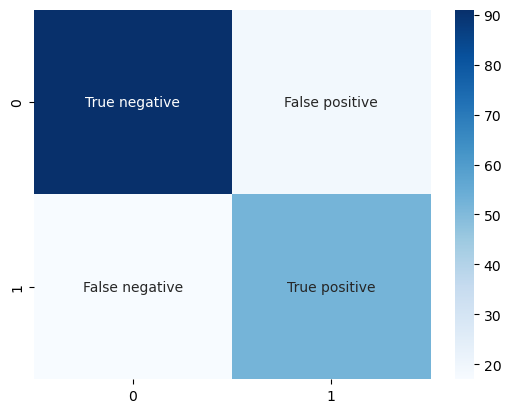

In [7]:
#Score of the first Model
y_predict = reg1.predict(X_test)
print(reg1.score(X_test, y_test))
cf_matrix = confusion_matrix(y_test, y_predict)

labels = ["True negative", "False positive", "False negative", "True positive"]
labels = np.asarray(labels).reshape(2,2)

print(cf_matrix)

sns.heatmap(cf_matrix, annot = labels, fmt = "", cmap = "Blues")

In [8]:
#Going onto the parameters to optimize
reg1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

0.8156424581005587
[[92 18]
 [15 54]]


<Axes: >

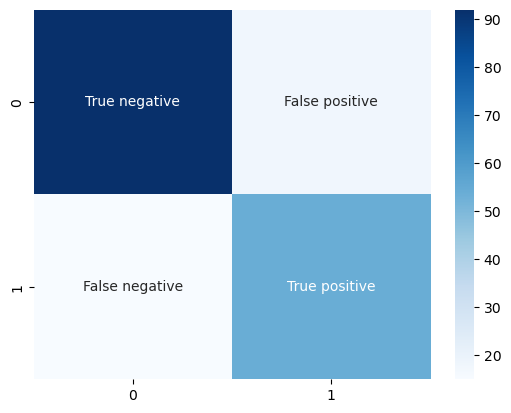

In [9]:
#We weakened the regularization and try again
reg2 = LogisticRegression(solver='liblinear',  C=10.0)
reg2.fit(X_train, y_train)

#Score of the second Model
y_predict = reg2.predict(X_test)
print(reg2.score(X_test, y_test))
cf_matrix = confusion_matrix(y_test, y_predict)

labels = ["True negative", "False positive", "False negative", "True positive"]
labels = np.asarray(labels).reshape(2,2)
    
print(cf_matrix)
sns.heatmap(cf_matrix, annot = labels, fmt = "", cmap = "Blues")

In [10]:
#It worked well the first time so we keep increasing C
reg3 = LogisticRegression(solver='liblinear',  C=20.0)
reg3.fit(X_train, y_train)

#Score of the second Model
y_predict = reg3.predict(X_test)
print(reg3.score(X_test, y_test))
cf_matrix = confusion_matrix(y_test, y_predict)

labels = ["True negative", "False positive", "False negative", "True positive"]
labels = np.asarray(labels).reshape(2,2)

print(cf_matrix)

0.8156424581005587
[[92 18]
 [15 54]]


In [11]:
#It worked well the second time so we keep increasing C
reg4 = LogisticRegression(solver='liblinear',  C=20.0, max_iter=1000)
reg4.fit(X_train, y_train)

#Score of the second Model
y_predict = reg4.predict(X_test)
print(reg4.score(X_test, y_test))
cf_matrix = confusion_matrix(y_test, y_predict)

labels = ["True negative", "False positive", "False negative", "True positive"]
labels = np.asarray(labels).reshape(2,2)

print(cf_matrix)

0.8156424581005587
[[92 18]
 [15 54]]


In [12]:
#It worked well the second time so we keep increasing C
reg4 = LogisticRegression(solver='liblinear',  C=20.0, max_iter=1000)
reg4.fit(X_train, y_train)

#Score of the second Model
y_predict = reg4.predict(X_test)
print(reg4.score(X_test, y_test))
cf_matrix = confusion_matrix(y_test, y_predict)

labels = ["True negative", "False positive", "False negative", "True positive"]
labels = np.asarray(labels).reshape(2,2)

print(cf_matrix)

0.8156424581005587
[[92 18]
 [15 54]]


In [17]:
save_dir = 'models/'
filename = 'Titanic.pt' #.pt,.pth, .ckpt

pickle.dump(reg4, open(filename, 'wb'))